In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
myfile = pd.read_csv("C:\\Users\\hp\\Desktop\\pyFile\\suicide.csv")
df = pd.DataFrame(myfile)
df

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.718000,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.991800,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.991800,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.991800,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.209500,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,488,Monday-July-17-2017,22 Shawaal 1432 A.H,Working Day,NaN,NaN,Peshawar,34.015000,71.5805,KPK,...,None,1.0,2.0,1.0,7,1.0,NaN,NaN,37.000,98.000
488,489,Monday-July-17-2017,22 Shawaal 1432 A.H,Working Day,NaN,NaN,Peshawar,34.015000,71.5805,KPK,...,None,1.0,1.0,1.0,1,1.0,NaN,NaN,37.000,98.000
489,490,Monday-July-24-2017,29 Shawaal 1432 A.H,Working Day,NaN,3:55pm,Lahore,31.500875,74.33312,Punjab,...,NaN,26.0,27.0,56.0,56,1.0,NaN,"Jinnah Hospital, General Hospital, Ittefaq Hos...",32.000,88.000
490,491,Saturday-August-12-2017,NaN,Weekend,NaN,5:00PM,Quetta,30.203658,67.004469,Balochistan,...,None,15.0,15.0,40.0,40,1.0,25KG,NaN,29.000,NaN


In [2]:
df["Province"] = df["Province"].str.lower()
df["Province"] = df["Province"].str.strip()
df["Province"]

0          capital
1            sindh
2            sindh
3            sindh
4      baluchistan
          ...     
487            kpk
488            kpk
489         punjab
490    balochistan
491    balochistan
Name: Province, Length: 492, dtype: object

In [3]:
pro = df["Province"].unique()
pro

array(['capital', 'sindh', 'baluchistan', 'punjab', 'fata', 'kpk', 'ajk',
       'balochistan'], dtype=object)

In [4]:
match = fuzzywuzzy.process.extract("baluchistan",pro,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
match

[('baluchistan', 100),
 ('balochistan', 91),
 ('fata', 40),
 ('capital', 22),
 ('ajk', 14)]

In [5]:
def replace(df,column,string_to_match,min_ratio=91):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match,strings,limit=2,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close = [matches[0] for matches in matches if matches[1] >= min_ratio]
    row_with_matches = df[column].isin(close)
    df.loc[row_with_matches,column] = string_to_match
    print("Done")
replace(df=df,column="Province",string_to_match="balochistan")    

Done


In [6]:
df["Province"].unique()

array(['capital', 'sindh', 'balochistan', 'punjab', 'fata', 'kpk', 'ajk'],
      dtype=object)

In [7]:
provs = df["Province"].unique()
provs

array(['capital', 'sindh', 'balochistan', 'punjab', 'fata', 'kpk', 'ajk'],
      dtype=object)

In [8]:
match

[('baluchistan', 100),
 ('balochistan', 91),
 ('fata', 40),
 ('capital', 22),
 ('ajk', 14)]

In [9]:
def replace(df,column,string_to_match,min_ratio=40):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match,strings,limit=2,scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close = [matches[0] for matches in matches if matches[1] >= min_ratio]
    row_with_matches = df[column].isin(close)
    df.loc[row_with_matches,column] = string_to_match
    print("Done")
replace(df=df,column="Province",string_to_match="Fata")    

Done


In [10]:
df["Province"].unique()

array(['Fata', 'sindh', 'balochistan', 'punjab', 'kpk', 'ajk'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       492 non-null    int64  
 1   Date                     492 non-null    object 
 2   Islamic Date             336 non-null    object 
 3   Blast Day Type           481 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     281 non-null    object 
 6   City                     492 non-null    object 
 7   Latitude                 490 non-null    float64
 8   Longitude                490 non-null    object 
 9   Province                 492 non-null    object 
 10  Location                 489 non-null    object 
 11  Location Category        457 non-null    object 
 12  Location Sensitivity     456 non-null    object 
 13  Open/Closed Space        457 non-null    object 
 14  Influencing Event/Event  1

In [12]:
df["Longitude"] = df["Longitude"].str.strip()
df["Longitude"] = df["Longitude"].str.lower()
df["Longitude"]

0        73.0718
1        66.9911
2        66.9911
3        66.9911
4        67.0182
         ...    
487      71.5805
488      71.5805
489     74.33312
490    67.004469
491    67.496895
Name: Longitude, Length: 492, dtype: object

In [13]:
df[df["S#"] == 479]


,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
478,479,Wednesday-Feb-15-2017,19 Jumada al-awwal 1438 A.H,Working Day,NaN,3:30 PM,Hayatabad,33.986111,�71.456944,kpk,...,None,1.0,1.0,4.0,18,1.0,15 KG,Hayatabad Medical Complex,16.63,61.934


In [14]:
df["Longitude"] = pd.to_numeric(df["Longitude"])
df["Longitude"].head()

ValueError: Unable to parse string "�71.456944" at position 478

In [32]:
cont = df.groupby(['Province']).size() #To count number of specific data in specific column 
cont

Province
Fata            93
ajk              6
balochistan     44
kpk            250
punjab          64
sindh           35
dtype: int64

<AxesSubplot:>

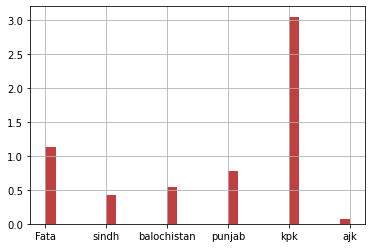

In [29]:
con = df["Province"]
con.hist(density=1, histtype='stepfilled', bins=30,color=sns.desaturate('red',0.5))